## LightGBM 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 加載數據
merged_df = pd.read_csv(r'C:\Users\User\Dropbox\taishin\taishin\merged_df1.csv')
df3 = pd.read_csv(r'C:\Users\User\Dropbox\taishin\taishin\file3.csv')

# Display data types of all columns
print(merged_df.dtypes)
print(df3.dtypes)

srno_2     int64
yyyymm     int64
aum01      int64
aum02      int64
aum03      int64
           ...  
intr_09    int64
intr_10    int64
intr_11    int64
intr_12    int64
intr_13    int64
Length: 96, dtype: object
srno_2        int64
rs_prod_1     int64
rs_prod_2     int64
rs_prod_3     int64
dtype: object


**用unique找出類別變數 寫入模型**

In [2]:
import pandas as pd

# Load your data
merged_df = pd.read_csv(r'C:\Users\User\Dropbox\taishin\taishin\merged_df1.csv')

# Option 1: Automatically select columns that pandas recognizes as categorical
categorical_cols = merged_df.select_dtypes(include=['object', 'category']).columns.tolist()

# Option 2: Manually specify categorical columns if you know which ones should be
# This might include columns with integer types that represent categories
# categorical_cols = ['column_name1', 'column_name2', 'column_name3', ...]

print("Categorical columns:", categorical_cols)


Categorical columns: []


In [3]:
# 顯示每個特徵的獨特值數量
for col in merged_df.columns:
    unique_count = merged_df[col].nunique()
    print(f"{col} has {unique_count} unique values")


srno_2 has 200000 unique values
yyyymm has 12 unique values
aum01 has 349706 unique values
aum02 has 323839 unique values
aum03 has 91417 unique values
aum04 has 16221 unique values
aum05 has 4045 unique values
aum06 has 9267 unique values
aum07 has 1072 unique values
aum08 has 200 unique values
aum09 has 59 unique values
aum10 has 1334 unique values
aum11 has 258 unique values
aum12 has 96105 unique values
bill_a1 has 5018 unique values
bill_a2 has 112243 unique values
bill_a3 has 140838 unique values
bill_a4 has 112745 unique values
bill_a5 has 139863 unique values
bill_a6 has 73812 unique values
pmt_a01 has 56765 unique values
pmt_a02 has 36927 unique values
pmt_a03 has 24687 unique values
pmt_a04 has 13154 unique values
pmt_a05 has 13156 unique values
pmt_a06 has 25187 unique values
pmt_a07 has 17435 unique values
pmt_a08 has 8017 unique values
pmt_a09 has 10789 unique values
pmt_a10 has 26912 unique values
pmt_a11 has 21528 unique values
pmt_a12 has 6133 unique values
pmt_a13 has 

In [20]:
# 最佳類別
categorical_features = [
    'yyyymm', 'YN_Web_Active', 'YN_secur',  'CNT_WBMB_Login', 'YN_SLR', 'INV_ADV', 'gender', 'mry', 'edu', 'job', 'occp', 'zip', 
    'intr_02', 'intr_06', 'intr_07',  'intr_08',  'intr_11','intr_12', 'intr_13','rs_prod_1', 'rs_prod_2', 
]

for feature in categorical_features:
    merged_df[feature] = merged_df[feature].astype('category')


In [36]:
# 最一開始 , 將 unique values <50 的歸類為類別變數
# 發現類別變數的歸類會影響預測和混淆矩陣

categorical_features = [
    'yyyymm', 'YN_Web_Active', 'YN_secur', 'YN_SLR', 'intr_07', 'intr_12', 'intr_13',
    'gender', 'mry', 'edu', 'job', 'occp', 'zip', 'rs_prod_1', 'rs_prod_2',
    'intr_02', 'intr_06', 'intr_08', 'pmt_c04', 'pmt_c05', 'pmt_c07', 'pmt_c08', 'pmt_c09', 
    'pmt_c11', 'pmt_c12', 'pmt_c13', 'pmt_c14', 'pmt_c15', 'pmt_c17', 'pmt_c18'
]

for feature in categorical_features:
    merged_df[feature] = merged_df[feature].astype('category')


In [37]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

X = merged_df.drop('rs_prod_3', axis=1)
y = merged_df['rs_prod_3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LGBMClassifier()
model.fit(X_train, y_train, categorical_feature=categorical_features)  # 告知 LightGBM 哪些是類別特徵


[LightGBM] [Info] Number of positive: 38480, number of negative: 1881520
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.286628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12388
[LightGBM] [Info] Number of data points in the train set: 1920000, number of used features: 95
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020042 -> initscore=-3.889697
[LightGBM] [Info] Start training from score -3.889697


LGBMClassifier()

C:\Users\User\AppData\Local\Temp\ipykernel_18948\175246597.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')


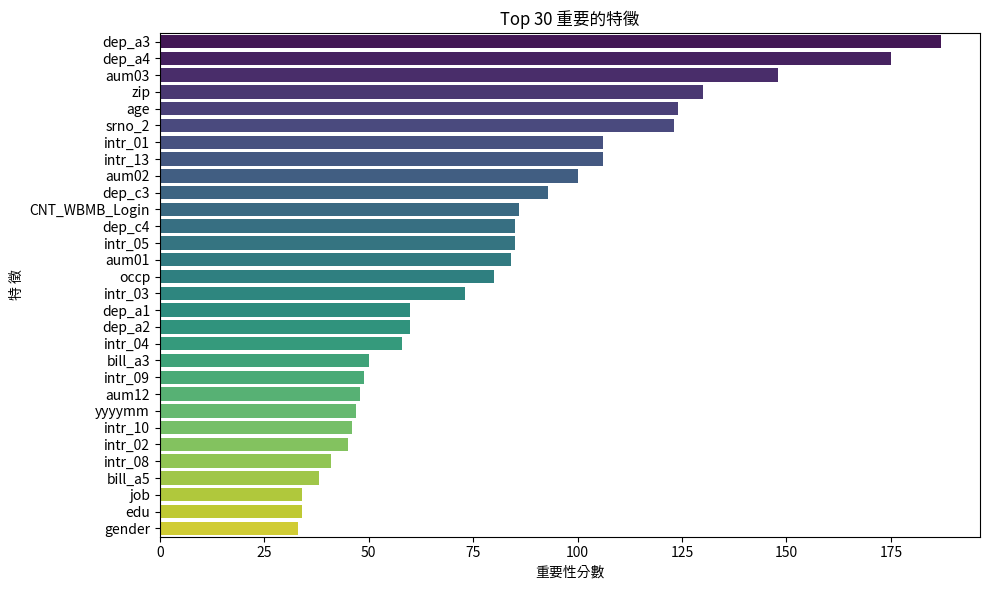

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import fontManager

# 假設 model 是您已經訓練好的LightGBM模型
# 假設 X_train 是用來訓練模型的特徵數據

# 獲取特徵重要性分數
importances = model.feature_importances_

# 創建特徵名稱和重要性的DataFrame
feature_names = X_train.columns  # X_train 應包含實際的特徵名稱
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# 選擇顯示前N個最重要的特徵
N = 30  # 您可以修改這個數字來顯示前N個特徵
top_features = feature_importances.head(N)

# 繪製特徵重要性條形圖
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
plt.rc('font', family='Taipei Sans TC Beta')

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title(f'Top {N} 重要的特徵')
plt.xlabel('重要性分數')
plt.ylabel('特 徵')
plt.tight_layout()  # 確保一切都不會重疊
plt.show()


In [39]:
# 得到预测概率
y_scores = model.predict_proba(X_test)[:, 1]

# 将预测概率与测试集对应起来
test_set_with_scores = X_test.copy()
test_set_with_scores['probability'] = y_scores

# 选择概率最高的前1000人
top_1000_customers = test_set_with_scores.sort_values('probability', ascending=False).head(1000)

# 计算预测为正类的平均概率
predicted_buy_rate = top_1000_customers['probability'].mean()

# 预测购买的人数
predicted_buyers = predicted_buy_rate * 1000

# 预期购买者的数量 = 概率最高的1000名客户的平均购买概率 * 1000
expected_buyers = predicted_buy_rate * 1000
print(f"預期在選定的1000名客戶中，將有大約 {expected_buyers:.0f} 人購買基金。")



預期在選定的1000名客戶中，將有大約 767 人購買基金。


[LightGBM] [Info] Number of positive: 38399, number of negative: 1881601
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.272208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12415
[LightGBM] [Info] Number of data points in the train set: 1920000, number of used features: 95
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.019999 -> initscore=-3.891847
[LightGBM] [Info] Start training from score -3.891847
[LightGBM] [Info] Number of positive: 38399, number of negative: 1881601
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.273358 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12416
[LightGBM] [Info] Number of data points in the train set: 1920000, number of used features: 95
[LightGB

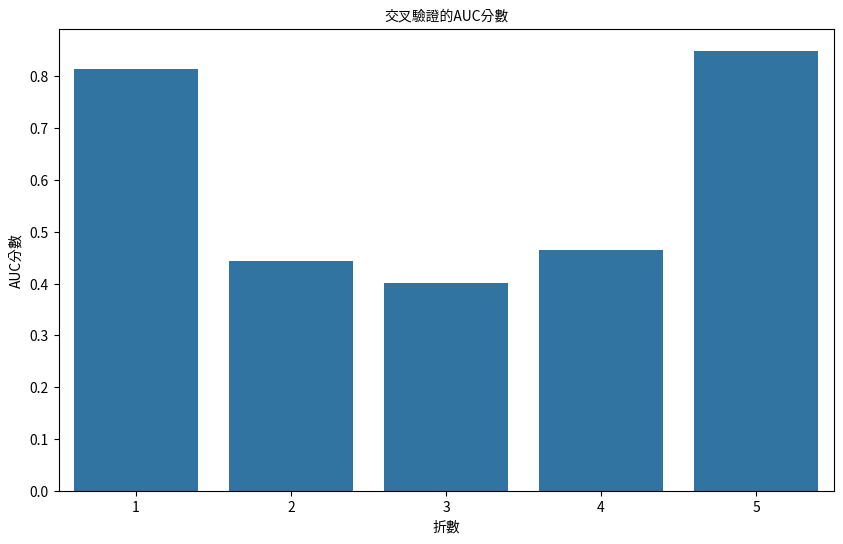

AUC scores for each fold are: [0.81436887 0.44363875 0.40156674 0.46548357 0.84946241]
Average AUC score: 0.5949040650096655


In [40]:
from sklearn.model_selection import cross_val_score
from matplotlib.font_manager import fontManager

# 计算交叉验证的AUC分数
cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
plt.rc('font', family='Taipei Sans TC Beta')

# 可视化交叉验证分数
plt.figure(figsize=(10, 6))
sns.barplot(x=list(range(1, 6)), y=cv_scores)
plt.title('交叉驗證的AUC分數', fontproperties='Taipei Sans TC Beta')
plt.xlabel('折數', fontproperties='Taipei Sans TC Beta')
plt.ylabel('AUC分數', fontproperties='Taipei Sans TC Beta')
plt.show()

print("AUC scores for each fold are:", cv_scores)
print("Average AUC score:", cv_scores.mean())


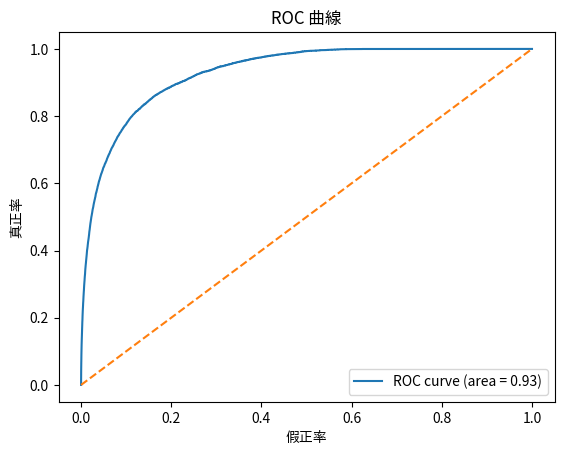

In [25]:
from sklearn.metrics import roc_curve

# 计算ROC曲线和AUC
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('假正率')
plt.ylabel('真正率')
plt.title('ROC 曲線')
plt.legend(loc='lower right')
plt.show()


[LightGBM] [Info] Number of positive: 38480, number of negative: 1881520
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.309709 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12409
[LightGBM] [Info] Number of data points in the train set: 1920000, number of used features: 95
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020042 -> initscore=-3.889697
[LightGBM] [Info] Start training from score -3.889697


C:\Users\User\AppData\Local\Temp\ipykernel_18948\2753159224.py:24: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * recalls * precisions / (recalls + precisions)


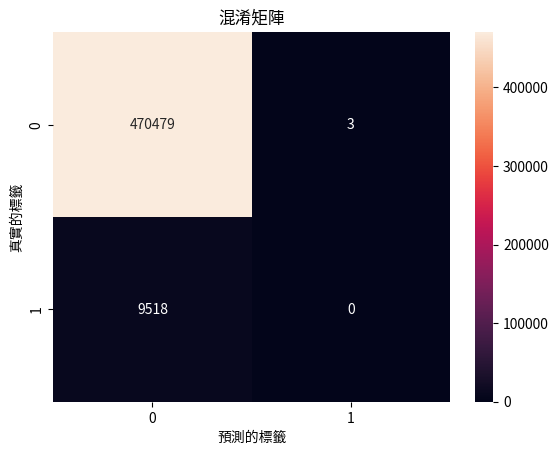

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    470482
           1       0.00      0.00      0.00      9518

    accuracy                           0.98    480000
   macro avg       0.49      0.50      0.49    480000
weighted avg       0.96      0.98      0.97    480000



In [26]:
from sklearn.metrics import precision_recall_curve, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 X 和 y 已经准备好
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 计算正负样本的比例
negative_count = len(y_train[y_train == 0])
positive_count = len(y_train[y_train == 1])

# 使用scale_pos_weight重新训练模型
model = LGBMClassifier(scale_pos_weight=negative_count / positive_count)
model.fit(X_train, y_train)

# 重新计算预测概率
y_scores = model.predict_proba(X_test)[:, 1]


# 计算新的最佳阈值
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)
f1_scores = 2 * recalls * precisions / (recalls + precisions)
best_threshold = thresholds[np.argmax(f1_scores)]  # 使用f1分数找最佳阈值

# 使用新阈值进行预测
y_pred_adjusted = (y_scores >= best_threshold).astype(int)

# 生成并输出新的混淆矩阵和分类报告
conf_mat = confusion_matrix(y_test, y_pred_adjusted)
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.title('混淆矩陣')
plt.xlabel('預測的標籤')
plt.ylabel('真實的標籤')
plt.show()

print(classification_report(y_test, y_pred_adjusted))


## 用平均法計算每個編號每個的所有月份預測的平均值

In [33]:
# 假设你已经有每个编号每个月的预测概率
# 首先，计算每个编号的预测概率平均值
average_predictions = test_set_with_scores.groupby('srno_2')['probability'].mean()

# 确定阈值并将平均概率转换为二进制预测
threshold = 0.5  # 你可以调整这个阈值以优化性能
predicted_classes = (average_predictions > threshold).astype(int)


In [34]:
# 确保df3的索引与average_predictions的索引相匹配
confusion_matrix = confusion_matrix(df3['rs_prod_3'], predicted_classes)
print(confusion_matrix)

# 分类报告
classification_report = classification_report(df3['rs_prod_3'], predicted_classes)
print(classification_report)


ValueError: Found input variables with inconsistent numbers of samples: [200000, 186480]

In [41]:
print(df3.shape)
print(average_predictions.shape)


(200000, 4)
(186480,)


## /12 每12個人 看投票

+ 根據以上結果得出

    + 對於1和0都有較好預測能力

    + 混淆矩陣

        + 3808的 *1* 被正確預測為 *1*

        + 5710的 *1* 被錯誤預測為 *0*

        + 463939的 *0* 被正確預測為 *0*

        + 6543的 *0* 被錯誤預測為 *1*

    + 分類報告

        + 精確率 *0.37*

        + 召回率 *0.40*

        + F1 score *0.38*

    + 我們的目標為提高召回率 , 能預測多少人? 非預測多準 , 當然越準越好

**重新平衡類別權重**

In [13]:
# 重新平衡類別權重

from lightgbm import LGBMClassifier

# 假設您已經有了正負樣本的數量
negative_count = len(y_train[y_train == 0])
positive_count = len(y_train[y_train == 1])

model = LGBMClassifier(scale_pos_weight=negative_count / positive_count)
model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 38480, number of negative: 1881520
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.270200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12409
[LightGBM] [Info] Number of data points in the train set: 1920000, number of used features: 95
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020042 -> initscore=-3.889697
[LightGBM] [Info] Start training from score -3.889697


LGBMClassifier(scale_pos_weight=48.896049896049895)

In [14]:
# 得到预测概率
y_scores = model.predict_proba(X_test)[:, 1]

# 将预测概率与测试集对应起来
test_set_with_scores = X_test.copy()
test_set_with_scores['probability'] = y_scores

# 选择概率最高的前1000人
top_1000_customers = test_set_with_scores.sort_values('probability', ascending=False).head(1000)

# 计算预测为正类的平均概率
predicted_buy_rate = top_1000_customers['probability'].mean()

# 预测购买的人数
predicted_buyers = predicted_buy_rate * 1000

# 预期购买者的数量 = 概率最高的1000名客户的平均购买概率 * 1000
expected_buyers = predicted_buy_rate * 1000
print(f"预期在选定的1000名客户中，将有大约 {expected_buyers:.0f} 人购买基金。")



预期在选定的1000名客户中，将有大约 978 人购买基金。


**交叉驗證**

[LightGBM] [Info] Number of positive: 38399, number of negative: 1881601
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.280374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12439
[LightGBM] [Info] Number of data points in the train set: 1920000, number of used features: 95
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.019999 -> initscore=-3.891847
[LightGBM] [Info] Start training from score -3.891847
[LightGBM] [Info] Number of positive: 38399, number of negative: 1881601
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.296685 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12438
[LightGBM] [Info] Number of data points in the train set: 1920000, number of used features: 95
[LightGB

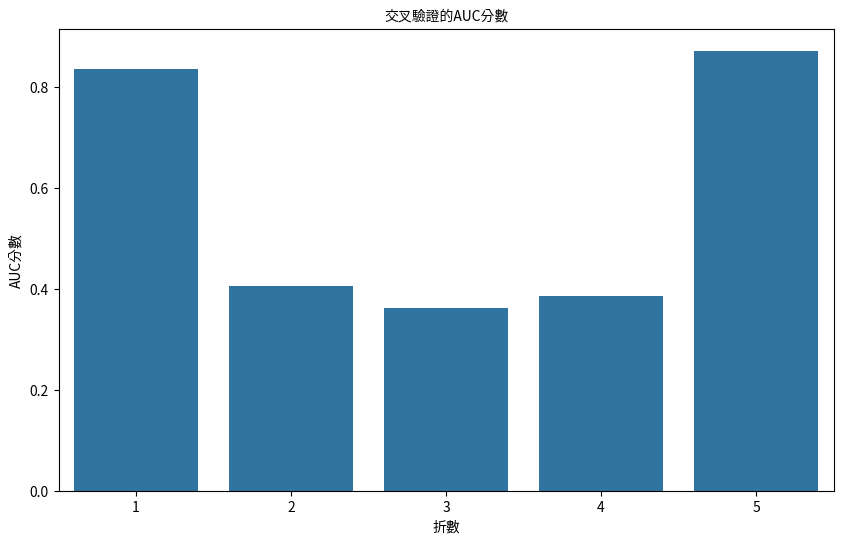

AUC scores for each fold are: [0.83488681 0.40457956 0.36153056 0.3858159  0.8710746 ]
Average AUC score: 0.5715774868172947


In [15]:
from sklearn.model_selection import cross_val_score
from matplotlib.font_manager import fontManager

# 计算交叉验证的AUC分数
cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
plt.rc('font', family='Taipei Sans TC Beta')

# 可视化交叉验证分数
plt.figure(figsize=(10, 6))
sns.barplot(x=list(range(1, 6)), y=cv_scores)
plt.title('交叉驗證的AUC分數', fontproperties='Taipei Sans TC Beta')
plt.xlabel('折數', fontproperties='Taipei Sans TC Beta')
plt.ylabel('AUC分數', fontproperties='Taipei Sans TC Beta')
plt.show()

print("AUC scores for each fold are:", cv_scores)
print("Average AUC score:", cv_scores.mean())


In [16]:
# 得到预测概率
y_scores = model.predict_proba(X_test)[:, 1]

# 将预测概率与测试集对应起来
test_set_with_scores = X_test.copy()
test_set_with_scores['probability'] = y_scores

# 选择概率最高的前1000人
top_1000_customers = test_set_with_scores.sort_values('probability', ascending=False).head(1000)

# 计算预测为正类的平均概率
predicted_buy_rate = top_1000_customers['probability'].mean()

# 预测购买的人数
predicted_buyers = predicted_buy_rate * 1000

# 预期购买者的数量 = 概率最高的1000名客户的平均购买概率 * 1000
expected_buyers = predicted_buy_rate * 1000
print(f"預期在選定的1000名客戶中，將有大約 {expected_buyers:.0f} 人購買基金。")



預期在選定的1000名客戶中，將有大約 978 人購買基金。


**混淆矩陣和分類報告**

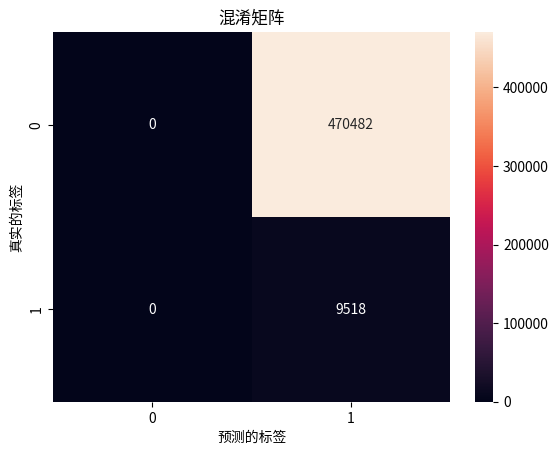

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00    470482
           1       0.02      1.00      0.04      9518

    accuracy                           0.02    480000
   macro avg       0.01      0.50      0.02    480000
weighted avg       0.00      0.02      0.00    480000



c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


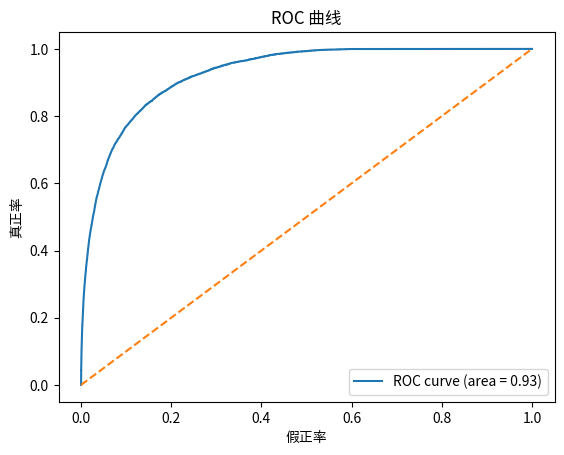

[LightGBM] [Info] Number of positive: 38399, number of negative: 1881601
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.272180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12439
[LightGBM] [Info] Number of data points in the train set: 1920000, number of used features: 95
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.019999 -> initscore=-3.891847
[LightGBM] [Info] Start training from score -3.891847
[LightGBM] [Info] Number of positive: 38399, number of negative: 1881601
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.273631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12438
[LightGBM] [Info] Number of data points in the train set: 1920000, number of used features: 95
[LightGB

In [17]:
from sklearn.metrics import precision_recall_curve, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# 假设 y_scores 是您的模型在测试集上预测每个样本为正类的概率
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

# 找到最佳阈值
best_threshold = thresholds[np.argmax(recalls - precisions)]

# 根据最佳阈值计算预测标签
y_pred_adjusted = (y_scores >= best_threshold).astype(int)

# 输出混淆矩阵
conf_mat = confusion_matrix(y_test, y_pred_adjusted)
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.title('混淆矩阵')
plt.xlabel('预测的标签')
plt.ylabel('真实的标签')
plt.show()

# 输出分类报告
print(classification_report(y_test, y_pred_adjusted))

# 计算ROC曲线和AUC
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('假正率')
plt.ylabel('真正率')
plt.title('ROC 曲线')
plt.legend(loc='lower right')
plt.show()

# 交叉验证
cv_auc = cross_val_score(model, X, y, scoring='roc_auc', cv=5)
print(f"5-fold CV AUC: {cv_auc.mean():.2f}")


+ 根據以上結果

    + 交叉驗證的AUC分數:平均0.57 > 0.5 但0.7以上較好

    + 混淆矩陣將所有預測為有申購的 需要調整閥值

    + ROC線(考慮各種閥值)下面積為0.93 表示模型整體性能強, 但和混淆矩陣(只考慮單一閥值)矛盾

**閥值調整改善召回率**

In [18]:
# 閥值調整改善召回率

import numpy as np
from sklearn.metrics import precision_recall_curve

# 得到模型的概率預測
y_scores = model.predict_proba(X_test)[:, 1]

# 計算精確率和召回率曲線
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

# 尋找最佳閾值
best_threshold = thresholds[np.argmax(recalls - precisions)]
print("Best threshold: ", best_threshold)

# 使用最佳閾值進行類別預測
y_pred_custom_threshold = (y_scores >= best_threshold).astype(int)


Best threshold:  0.00019072694854435347
